In [2]:
# !pip install 'transformers[torch]'

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import urllib.request

In [5]:
from transformers import pipeline

vision_classifier = pipeline(model="google/vit-base-patch16-224")
preds = vision_classifier(
    images="https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"]} for pred in preds]
preds

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.


[{'score': 0.4335, 'label': 'lynx, catamount'},
 {'score': 0.0348,
  'label': 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor'},
 {'score': 0.0324, 'label': 'snow leopard, ounce, Panthera uncia'},
 {'score': 0.0239, 'label': 'Egyptian cat'},
 {'score': 0.0229, 'label': 'tiger cat'}]

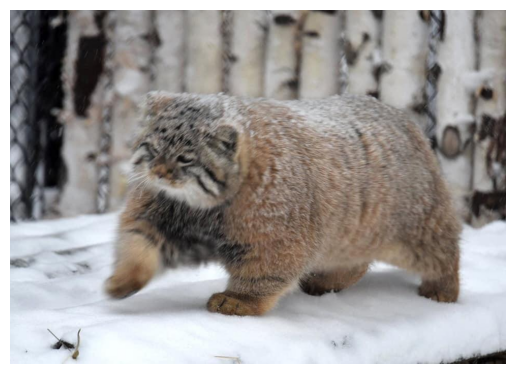

In [17]:
# Open the URL and load the image
url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
with urllib.request.urlopen(url) as response:
    img = Image.open(response)

# Convert the image to a NumPy array
img_array = np.array(img)

# Display the image
plt.imshow(img_array)
plt.axis('off')  # Hide the axis
plt.show()

In [11]:
from transformers import pipeline

# This model is a `zero-shot-classification` model.
# It will classify text, except you are free to choose any label you might imagine
classifier = pipeline(model="facebook/bart-large-mnli")
classifier(
    "I have a problem with my iphone that needs to be resolved asap!!",
    candidate_labels=["urgent", "not urgent", "phone", "tablet", "computer"],
)

/home/user/miniforge3/envs/torch/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


{'sequence': 'I have a problem with my iphone that needs to be resolved asap!!',
 'labels': ['urgent', 'phone', 'computer', 'not urgent', 'tablet'],
 'scores': [0.5036353468894958,
  0.478799968957901,
  0.012600144371390343,
  0.0026557829696685076,
  0.0023087612353265285]}

In [20]:
# !pip install gradio==3.40.0

In [23]:
from transformers import pipeline
import gradio as gr

pipe = pipeline("image-classification", model="google/vit-base-patch16-224")

app = gr.Interface.from_pipeline(pipe)
app.launch(inline=False, share=True)

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
/tmp/ipykernel_9998/2233220952.py:6: GradioUnusedKwargWarning: You have unused kwarg parameters in Label, please remove them: {'type': 'confidences'}
  app = gr.Interface.from_pipeline(pipe)


Running on local URL:  http://127.0.0.1:7861
IMPORTANT: You are using gradio version 3.40.0, however version 4.29.0 is available, please upgrade.
--------
Running on public URL: https://e38811b3a08f1a2a30.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


Traceback (most recent call last):
  File "/home/user/miniforge3/envs/torch/lib/python3.11/site-packages/gradio/routes.py", line 488, in run_predict
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/user/miniforge3/envs/torch/lib/python3.11/site-packages/gradio/blocks.py", line 1424, in process_api
    inputs = self.preprocess_data(fn_index, inputs, state)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/user/miniforge3/envs/torch/lib/python3.11/site-packages/gradio/blocks.py", line 1245, in preprocess_data
    processed_input.append(block.preprocess(inputs[i]))
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/user/miniforge3/envs/torch/lib/python3.11/site-packages/gradio/components/image.py", line 274, in preprocess
    im = processing_utils.decode_base64_to_image(x)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/user/miniforge3/envs/torch/lib/python3.11/site-pa